# CS342: Colab Template

This is the verbose version of the notebook you will using, if you choose to use Colab to train.  

We recommend you edit all the information and save your own copy which you can use for all the homeworks.

## 1. Set up the GPU

GPU will not be needed for the first assignment.

In [1]:
!git clone https://github.com/hunter3789/VLM.git
%cd VLM
%pwd

Cloning into 'VLM'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 102 (delta 51), reused 37 (delta 20), pack-reused 17 (from 1)
Receiving objects: 100% (102/102), 43.96 MiB | 18.75 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (12/12), done.
/content/VLM


'/content/VLM'

## 2. Sync your code to Colab


[Raw data]
"stn_id": 159
"case": 2024-07-05 15:00:00
"data": [{'pres': 999.7, 'ta': 26.5, 'td': 23.1, 'u': 4.2, 'v': 5.6}, {'pres': 950, 'ta': 24.2, 'td': 21.1, 'gh': 493.9, 'wsd': 11.5, 'vec': 245.9, 'u': 10.5, 'v': 4.7}, {'pres': 925, 'ta': 23.4, 'td': 20.1, 'gh': 727.9, 'wsd': 10.5, 'vec': 258.9, 'u': 10.3, 'v': 2.0}, {'pres': 900, 'ta': 22.1, 'td': 18.9, 'gh': 967.6, 'wsd': 9.6, 'vec': 272.2, 'u': 9.6, 'v': -0.4}, {'pres': 850, 'ta': 19.4, 'td': 15.0, 'gh': 1463.0, 'wsd': 9.7, 'vec': 283.4, 'u': 9.4, 'v': -2.2}, {'pres': 800, 'ta': 19.3, 'td': 6.9, 'gh': 1985.9, 'wsd': 14.5, 'vec': 272.9, 'u': 14.5, 'v': -0.7}, {'pres': 700, 'ta': 11.7, 'td': 3.7, 'gh': 3119.0, 'wsd': 21.1, 'vec': 262.4, 'u': 20.9, 'v': 2.8}, {'pres': 600, 'ta': 5.4, 'td': -8.8, 'gh': 4393.6, 'wsd': 22.8, 'vec': 267.8, 'u': 22.8, 'v': 0.9}, {'pres': 500, 'ta': -2.1, 'td': -39.7, 'gh': 5862.9, 'wsd': 18.5, 'vec': 259.1, 'u': 18.2, 'v': 3.5}, {'pres': 400, 'ta': -13.0, 'td': -38.0, 'gh': 7601.8, 'wsd': 15.3, 'vec': 2

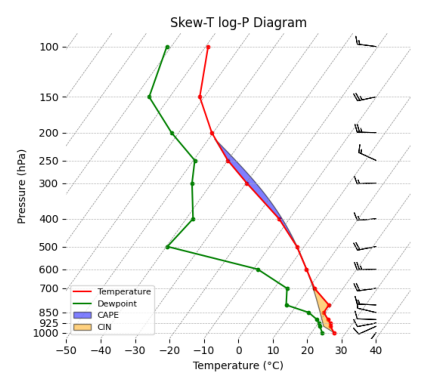


[Prompt generation]
{"system": "You are a weather forecaster analyzing atmospheric soundings shown in a Skew-T log-P diagram
The diagram uses a logarithmic vertical pressure axis (hPa), so pressure layers are not evenly spaced. Use the following visual anchors:
Lower layer (1000-850 hPa): This is located in the bottom quarter of the diagram, close to the surface. It represents the boundary layer where surface temperature, dew point, and CIN typically appear.
Mid layer (850-500 hPa): Appears in the second quarter from the bottom of the plot. This region often contains most of the CAPE and developing updrafts.
Upper layer (500-250 hPa): This is around the middle third of the diagram, despite covering less pressure range. This layer includes the top of convection (EL), cirrus clouds, and upper-level wind shear.
Use the following visual references:
Red line: temperature profile
Green line: dew point temperature
Blue shaded area: CAPE (Convective Available Potential Energy)
Yellow shaded a

In [ ]:
from source.tool_call import get_data, process_data, draw_skew, generate_prompt_response_vlm
import matplotlib.pyplot as plt

raw_data = get_data()
print("[Raw data]")
for key, value in raw_data.items():
    if key != 'image':
        print(f'"{key}": {value}')

processed_data = process_data(raw_data)
print("\n[Processed data]")
for key, value in processed_data.items():
    if key not in ['stn_id', 'case', 'rn3h', 'data', 'cape_polygon', 'cin_polygon']:
        print(f'"{key}": {value:.1f}')

# Plot Image
print("\n[Image]")
image = draw_skew(processed_data)
plt.imshow(image)
plt.axis('off')  # Optional: Hide axes
plt.show()

# VLM text generator
print("\n[Prompt generation]")
system_message, user_prompt, response = generate_prompt_response_vlm(processed_data)
print(f'{{"system": "{system_message}",\n')
print(f'"user": "{user_prompt}",\n')
print(f'"assistant": "{response}"}}')

In [ ]:
from source.base_vlm import BaseVLM

vlm = BaseVLM()

# Load the model with LoRA adapters
from peft import PeftModel

ckpt_path = './model/vlm_curriculum_image_2.2B'
vlm.model = PeftModel.from_pretrained(vlm.model, ckpt_path, local_files_only=True).to(vlm.device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/modeling_auto.py:2160: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


In [ ]:
print("[Inference]")
response = vlm.answer([image], [system_message], [user_prompt], temperature = 0, use_images=True, use_image_path=False)
print(f'"assistant": "{response[0]}"')

[Inference]
"assistant": "A narrow blue-shaded area (CAPE) suggests limited instability. Shallow convection might occur under favorable surface conditions.
A heavy yellow band (CIN) suggests a stable lower atmosphere resistant to convective initiation under normal conditions.
The Skew-T shows an unsupportive environment for convection, with insufficient moisture throughout.
Based on the analysis, the probability of precipitation is low."
